# Predicting if patients have diabetes

**Group No.25**

**By Bryan Zai Zheng Puah** (**S3783001**)

# Table of Contents

- [Introduction](#Introduction)

    - [Phase 1 Summary](#Phase-1-Summary)
    - [Report Overview](#Report-Overview)
    - [Overview of Methodology](#Overview-of-Methodology)
   
- [Data Preparation](#Data-Preparation)
- [Predictive Modelling](#Predictive-Modelling)
    - [Feature Selection](#Feature-Selection)
    - [Model Fitting & Tuning](#Model-Fitting-&-Tuning)
    - [Model Comparison](#Model-Comparison)
    
- [Critque & Limitations](#Critque-&-Limitations)
- [Summary & Conclusions](#Summary-&-Conclusions)
    - [Project Summary](#Project-Summary)
    - [Summary of Findings](#Summary-of-Findings)
    - [Conclusions](#Conclusions)
- [References](#References)



# Introduction

### Phase 1 Summary
In phase 1 of the project before any predictive modelling we performed data preprocessing and data exploration of the diabetes dataset. During data preprocessing we check for unsual and missing values which there were none, identified outliers in the numerical features which we understood were important to keep as they provided valuable information in terms of identifying potential correlations or relationships between the features. Moreover, we discretize the 'age' and 'pregnancies' variable which contains several unique numerical values and placed them in groups for easier visualsation and understanding of the variables. On the other hand, we also performed data visualisation on several features to gain a better understanding of them. As such the data exploration includes univaratie, bivariate and multivariate visualisation. Through these explorations we were able to gain a better understanding of the influences of each features on each other and which will ultimately be used in the predictive models to help predict if patients will have diabetes. Moreover, by ensuring that the datasets are clean before building the predictive model, we ensure unwanted and irrelevant observations are not included in the data before bulding the models, thus ensuring the results obtained are accurate.

### Report Overview

In phase 2 of the project as the data was mostly cleaned as observed in phase 1, the required data preparation step for the diabetes dataset before performing any predictive modelling includes scaling the descriptive features using the Min-Max scaler. We then split the dataset into training and test sets with a 70:30 ratio. Moreover we do not sample the dataset considering the total number of observations is 768 observations which would not significantly affect the computation and run time. 

In the predictive modelling stage, we considered the KNN, Decision Tree and Random Forest classifier, from which were used to help predict patients with diabetes. As such before fitting the classifiers on the test data, we perform feature selection and fine-tune the hyperparameters for each of the 3 classifiers. Moreover from using grid search to help obtain the optimal hyperparameters for each model, the search also examine sensitivity of each model with respect to its hyperparameter. 

Afterthat, using the best tuned classifiers and fitting them on the test data using 10-fold cross validation, the paired t-test was used to help identify the statistically best performing algorithm. Moreover, comparing the classifiers with respect to their recall scores and confusion matrices on the test data. 

Finally, we outline strength and weaknesses in our study and provided a summary of the overall study including the data preparation and visualisation phase done previously on the diabetes dataset and provided the conclusion as to how this study helped achieve the goals and objectives of the overall project. 

### Overview of Methodology

In the predictive modelling stage, we consider 3 classifiers to predict the target feature (diabetes/no diabetes). They are K-Nearest Neighbors, Decision Tree and Random Forest.
After performing transformation on the already clean dataset, which includes scaling the descriptive features using the Min Max scaler, we move on to the predictive modelling phase. 

Before we fit the model on the training data, we first looked at the 6 most important features selected by the Random Forest Importance. Moreover we included RFI in a pipeline to determine the number of features which worked best for each of three classifier: KNN, decision tree and random forest. As such we considered 5,7 and the full set of 8 features. We also performed a 2-repeated 5-fold-cross-validation to fine tune the hyperparameters of each of the 3 classifiers, using RFI feature selection and parameter search inside a pipeline. Moreover, given the presence of class imblance where there are significantly more non-diabetic patients compared to patients with diabetes discovered during exploratory analysis, we used the ROC area under the curve as the performance metric. Additionally, we utilise Grid search to obtain the optimal hyperparameters for each model.

Finally, from obtaining the classifiers which are best tuned, we then fit them on the test data utilising the 10-fold cross validation, and performed a paired t-tests to observe if any performance difference is statistically significant. Moreover, using the recall scores and confusion matrices on the test data to compare the 3 different classifiers.


# Data Preparation

As data preparation was performed in phase 1, it was understood that there were no missing or unsual values obtained. Moreover there were no columns such as ID to handle, thus we do not have to handle any of these issues and will proceed with the following necessary steps for building the predictive models. As such before building any predictive models we also partition the dataset into a set of descriptive features and the target feature as well as scale all the descriptive features to be between 0 and 1 which was not performed during the first phase of the project. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
#Load dataset from a csv file
diabetes = pd.read_csv("diabetes.csv")

In [5]:
#Observe first 5 rows of dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Partition  dataset into set of descriptive features and the target feature

In [6]:
#Split diabetes dataset in to descriptive features-data and target feature-target
Data = diabetes.iloc[:, :-1]
target = diabetes.iloc[:, -1]

### Scaling of Features

In [7]:
#Perform MinMaxScaler on descriptive numerical features
from sklearn import preprocessing
Data_cols = Data.columns
Data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(Data), columns = Data_cols).round(3)

In [8]:
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.353,0.744,0.590,0.354,0.000,0.501,0.234,0.483
1,0.059,0.427,0.541,0.293,0.000,0.396,0.117,0.167
2,0.471,0.920,0.525,0.000,0.000,0.347,0.254,0.183
3,0.059,0.447,0.541,0.232,0.111,0.419,0.038,0.000
4,0.000,0.688,0.328,0.354,0.199,0.642,0.944,0.200


# Predictive Modelling

### Feature Selection

We will first look at the most important 6 features which are selected by the RandomForestClassifier (RFI) on the full dataset. Moreover, during hyperparameter tuning, we intend to utilzie RFI in a pipeline to determine which number of features is best with each classifier. 

In [9]:
from sklearn.ensemble import RandomForestClassifier
num_features = 6
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
best_features_rfi = Data.columns[fs_indices_rfi].values
best_features_rfi

array(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction',
       'BloodPressure', 'Pregnancies'], dtype=object)

In [10]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.26628084, 0.16302065, 0.13389166, 0.11884483, 0.08989281,
       0.0849784 ])

### Visualise these importances

In [11]:
df = pd.DataFrame({'features': best_features_rfi, 'importances': feature_importances_rfi})
df

,features,importances
0,Glucose,0.266281
1,BMI,0.163021
2,Age,0.133892
3,DiabetesPedigreeFunction,0.118845
4,BloodPressure,0.089893
5,Pregnancies,0.084978


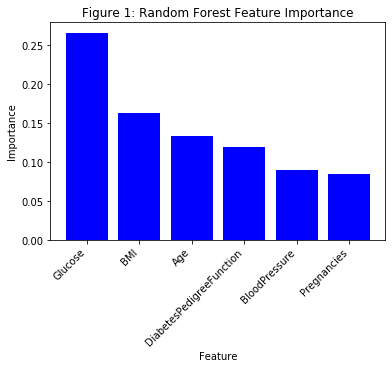

In [12]:
plt.bar(best_features_rfi, feature_importances_rfi, color='blue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Figure 1: Random Forest Feature Importance')
plt.show()


Based on figure 1, we observe the most important feature is Glucose and then BMI followed by Age, DiabetesPedigreeeFunction. 

# Model Fitting & Tuning

In [13]:
#Use values method on Data and target variable to convert it to a Numpy array
Data = Data.values
target = target.values

### Train Test splitting

We split the dataset as 70% training set and 30% testing set using the stratified sampling on target and a random seed of 111.

In [14]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data,target,test_size = 0.3,random_state = 111,
                                                    stratify = target)


In [15]:
#Print shape of train and test set
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


### Model Evaluation Strategy

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=999)

### KNN

We utilise cross-validation to obtain the optimal KNN parameters using a 2-repeated 5 fold stratified cross-validation on the training set. Moreover as we understand through visualisation in phase 1 that there is a class imbalance, the roc_auc will be used as the performance metric. 

We will also use the pipeline and grid search to help determine the optimal K nearest neighbor parameters.
The KNN hyperparameters are as follows:

- number of neighbors(n_neighbors)
- the distance metric p

For feature selection, we use Random Forest Importance (RFI) with 100 estimators. We define the custom RFIFeatureSelector() class below to pass in RFI as a 'step' to the pipeline. 

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_features_=8):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [5, 7, Data.shape[1]],
                   'knn__n_neighbors': [1, 3, 5, 10, 15, 20, 30],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1) 

In [19]:
gs_pipe_KNN.fit(D_train, t_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-2)]: Done 420 out of 420 | elapsed:   45.4s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=999),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfi_fs',
                                        RFIFeatureSelector(n_features_=8)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=-2,
             param_grid=

In [20]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 20, 'knn__p': 1, 'rfi_fs__n_features_': 5}

In [21]:
gs_pipe_KNN.best_score_

0.8457793131477341

We observe that the best performance is with 5 features as selected by the Random Forest Importance with 20 nearest neighbors and with the Manhattan distance metric with an AUC score of 84.57%. 

We will also look at other combinations to see if the difference is significant or not.

In [22]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [23]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
30,0.845779,0.028853,0.891353,0.800000,20.0,1.0,5.0
36,0.844918,0.037101,0.894173,0.787259,30.0,1.0,5.0
39,0.843791,0.028298,0.885150,0.796332,30.0,2.0,5.0
24,0.836942,0.027285,0.894549,0.791892,15.0,1.0,5.0
33,0.834121,0.031418,0.888722,0.776255,20.0,2.0,5.0


We observe that the hyperparameter combinations between the selected features is relatively small. As shown, the AUC score difference between the hyperparameter conditions are not significant. 

In [24]:
results_KNN_5_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 5]

In [25]:
d={1:"Manhattan",2:"Euclidean"}
results_KNN_5_features['distance']=results_KNN_5_features.knn__p.apply(lambda x:d[x])

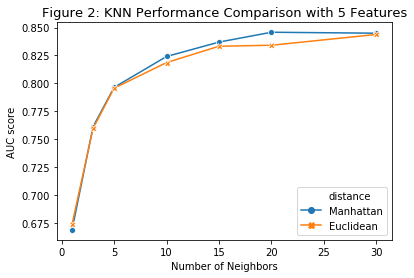

In [26]:
sns.lineplot(x="knn__n_neighbors", y="mean_score", hue="distance", style = "distance",
 markers = True, dashes=False, data=results_KNN_5_features)
plt.title('Figure 2: KNN Performance Comparison with 5 Features', fontsize = 13
)
plt.xlabel('Number of Neighbors')
plt.ylabel('AUC score')
plt.show()

Based on figure 2, it can be observed that the Manhattan distance performed better than the Euclidean distance when the number of neighbors is greater than 5. Moreover, the AUC score is seen to have very little change after the number of neighbors reaches 30.

### Decision Tree

We utilise cross-validation to obtain the optimal Decision Tree parameters using 2 repeated 5-fold stratified cross validation on the training set. Moreover given the class imbalance in this dataset the roc_auc is also chosen as the performance metric. 

We will use the pipeline and gridsearch to help determine the optimal Decision Tree parameters. The decision tree parameters are as follows:
- decision tree criterion 
- decision tree maximum depth

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier())])

params_pipe_DT = {'rfi_fs__n_features_': [5, 7, Data.shape[1]],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': [2, 4, 6,8,10]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

In [29]:
gs_pipe_DT.fit(D_train, t_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   28.8s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=999),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfi_fs',
                                        RFIFeatureSelector(n_features_=8)),
                                       ('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_...
             

In [30]:
gs_pipe_DT.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 4, 'rfi_fs__n_features_': 7}

In [31]:
gs_pipe_DT.best_score_

0.788508941272099

As observe from the results, the best performance is with 7 features as selected by the Random Forest Importance (RFI) with gini as the criterion and max depth of 4 for an AUC score of 78.85%.

In [32]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,rfi_fs__n_features_
4,0.788509,0.0539842,0.898872,0.709073,gini,4,7
19,0.787436,0.0424255,0.852632,0.684749,entropy,4,7
18,0.786064,0.0437543,0.853008,0.713514,entropy,4,5
20,0.785618,0.0382604,0.852632,0.715251,entropy,4,8
3,0.780579,0.0678618,0.898872,0.667181,gini,4,5


We observe that the hyperparameter combinations between the selected features is relatively small. As shown, the AUC score difference between the hyperparameter conditions are not significant.

In [33]:
results_DT_4_depth = results_DT[results_DT['rfi_fs__n_features_'] == 7]
results_DT_4_depth.dt__max_depth = results_DT_4_depth.dt__max_depth.astype(float)
results_DT_4_depth.mean_score = results_DT_4_depth.mean_score.astype(float)

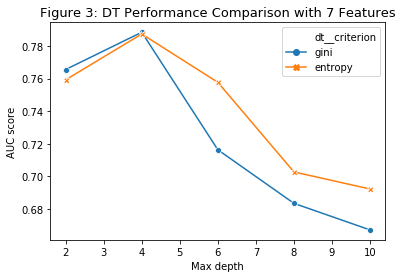

In [34]:
sns.lineplot(x="dt__max_depth", y="mean_score", hue="dt__criterion", style = "dt__criterion",
 markers = True, dashes=False, data= results_DT_4_depth)
plt.title('Figure 3: DT Performance Comparison with 7 Features', fontsize = 13)
plt.xlabel('Max depth')
plt.ylabel('AUC score')
plt.show()

Based on figure 3, it can be observed that the gini criterion performs better than the entropy criterion when max depth is between 2 and 4. However, the AUC starts to drop after max depth reaches 4. Hence the model obtain is optimal when max depth equals 4. 

### Random Forest

We utilise cross-validation to obtain the optimal Random Forest parameters using 2 repeated 5-fold stratified cross validation on the training set. As such, the roc_auc performance metric is chosen because of the class imbalance as utilised in the previous models. 

Using the pipeline and grid search to determine the optimal Random Forest parameters, the Random Forest hyperparameters we aim to tune are as follows:
- Number of estimators
- Random Forest criterion
- Random Forest maximum depth

In [35]:
from sklearn.ensemble import RandomForestClassifier
df_classifier = RandomForestClassifier()
pipe_RF = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()),
                          ('rf', df_classifier)])


params_pipe_RF = {'rfi_fs__n_features_': [5, 7, Data.shape[1]],
                  'rf__n_estimators': [20, 40, 60, 80, 100],
                  'rf__criterion': ['gini', 'entropy'],
                  'rf__max_depth': [3, 4, 5]}


gs_pipe_RF = GridSearchCV(estimator=pipe_RF,
                          param_grid=params_pipe_RF,
                          cv=cv_method,
                          scoring='roc_auc',
                          n_jobs = -2,
                          refit=True,
                          verbose=1)



In [36]:
gs_pipe_RF.fit(D_train, t_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 900 out of 900 | elapsed:  2.3min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=999),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfi_fs',
                                        RFIFeatureSelector(n_features_=8)),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                     

In [37]:
gs_pipe_RF.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 4,
 'rf__n_estimators': 60,
 'rfi_fs__n_features_': 5}

In [38]:
gs_pipe_RF.best_score_

0.8569945133103027

As observe from the results, we get the best performance with 5 features selected by the Random Forest Importance (RFI) with entropy as the criterion and with max depth of 4 and 60 trees in the forest for an accuracy score of 85.69%.

In [39]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head()

,mean_score,std_score,max_score,min_score,rf__criterion,rf__max_depth,rf__n_estimators,rfi_fs__n_features_
66,0.856995,0.022632,0.892857,0.818147,entropy,4,60,5
75,0.855598,0.0210542,0.900752,0.832707,entropy,5,20,5
63,0.855543,0.0191816,0.885714,0.821236,entropy,4,40,5
51,0.8555,0.01871,0.883083,0.827413,entropy,3,60,5
87,0.855324,0.0205488,0.897744,0.826255,entropy,5,100,5


We observe that the hyperparameter combinations between the selected features is relatively small. As shown, the AUC score difference between the hyperparameter conditions are not significant.

In [40]:
results_RF_5_features = results_RF[results_RF['rfi_fs__n_features_'] == 5.0]
results_RF_5_features.rf__max_depth = results_RF_5_features.rf__max_depth.astype(float)
results_RF_5_features.mean_score = results_RF_5_features.mean_score.astype(float)

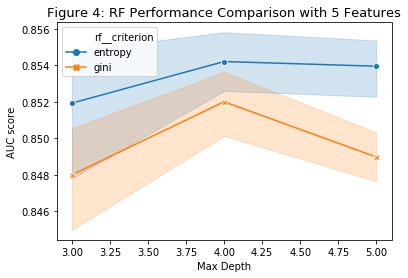

In [41]:
sns.lineplot(x="rf__max_depth", y="mean_score", hue="rf__criterion", style = "rf__criterion",
             markers = True, dashes=False, data=results_RF_5_features)
plt.title('Figure 4: RF Performance Comparison with 5 Features', fontsize = 13)
plt.xlabel('Max Depth')
plt.ylabel('AUC score')
plt.show()

Based on figure 4, the entropy criterion performs consistently better than the gini index at max depth.

# Model Comparison

We condut a paired t-test to help determine if any difference in performance regarding the AUC score between any two tuned classifiers is statistically significant. A 10-fold stratified cross-validation with no repetition on each classifier which are tuned is first performed. Finally a paired t-test for the AUC score between the following classifier combinations is conducted:
- KNN vs DT
- KNN vs RF
- DT vs RF

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv_method_ttest = StratifiedKFold(n_splits=10, random_state=222)

### Fit KNN

In [43]:
cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test,
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='roc_auc')

In [44]:
cv_results_KNN.mean()

0.7890277777777778

### Fit DT

In [45]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                 X=D_test,
                                 y=t_test,
                                 cv=cv_method_ttest,
                                 n_jobs=-2,
                                 scoring='roc_auc')

In [46]:
cv_results_DT.mean()

0.6912499999999999

### Fit RF

In [47]:
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=D_test,
                                y=t_test,
                                cv=cv_method_ttest,
                                n_jobs=-2,
                                scoring='roc_auc')

In [48]:
cv_results_RF.mean()

0.7912037037037037

In [49]:
from scipy import stats
print('KNN vs DT:', stats.ttest_rel(cv_results_KNN, cv_results_DT))
print('KNN vs RF:', stats.ttest_rel(cv_results_KNN, cv_results_RF))
print('DT vs RF:', stats.ttest_rel(cv_results_DT, cv_results_RF))

KNN vs DT: Ttest_relResult(statistic=4.116841740960746, pvalue=0.0026102145752021767)
KNN vs RF: Ttest_relResult(statistic=-0.1497172174733714, pvalue=0.8842891386306118)
DT vs RF: Ttest_relResult(statistic=-3.9928047063495757, pvalue=0.003144388064740096)


Based on the result, we can conclude that the Random Forest has the highest AUC score and is statistically the best model amongst the 3 classifiers in terms of AUC when compared on the test data, considering its p-value is less than 0.05. 
As we have considered AUC, we will also look at other metrics to evaluate the model on the test set, which include:
- Accuracy 
- Precision
- Recall
- F1 Score
- Confusion matrix

In [50]:
pred_KNN = gs_pipe_KNN.predict(D_test)

In [51]:
pred_DT = gs_pipe_DT.predict(D_test)

In [52]:
pred_RF = gs_pipe_RF.predict(D_test)

In [53]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor")
print(metrics.classification_report(t_test, pred_KNN))
print("\nClassification report for Decision Tree")
print(metrics.classification_report(t_test, pred_DT))
print("\nClassification report for Random Forest")
print(metrics.classification_report(t_test, pred_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.64      0.47      0.54        81

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       150
           1       0.61      0.41      0.49        81

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231


Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       150
           1       0.63      0.51      0.56        81

    accuracy                           0.72       231


In [54]:
print("\nConfusion matrix for K-Nearest Neighbor")
print(metrics.confusion_matrix(t_test, pred_KNN))
print("\nConfusion matrix for Decision Tree")
print(metrics.confusion_matrix(t_test, pred_DT))
print("\nConfusion matrix for Random Forest")
print(metrics.confusion_matrix(t_test, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[129  21]
 [ 43  38]]

Confusion matrix for Decision Tree
[[129  21]
 [ 48  33]]

Confusion matrix for Random Forest
[[126  24]
 [ 40  41]]


Overall the confusion matrices results are reflected in the classfication reports. Given the Random Forest was the best performing model in terms of AUC, we also can conclude that information-based learning algorithm is the best for this particular problem. Moreover, RF is the best model for this classification problem as it has it has a statistically significant higher AUC score. 

# Critque & Limitations

The modelling stage in this project has few limitations however there are also aspect of the analysis that could be improved. A weakness in the analysis includes not going in depth as to why there may be a class imblance such that there are more people without diabetes than with diabetes. As such a greater depth of analysis on the features could have been conducted to understand the reason behind this trend. Moreover, another weakness in the approach includes having little domain knowledge in the medical field and particularly regarding diabetes. As such, with greater knowledge in the field and particularly understanding the nature of each descriptive features this could have benefited during the stages of feature selection and feature ranking. Elsewhere, given the size of the dataset which contains 768 observations which is on the small to medium size, this could have also influence as to how accurate the results are in comparison to a dataset that is larger.

In contrast a strength in this approach was experimenting with different classifiers and understanding that the information-based learning algorithm of the Random Forest was a good classifier for this particular classification problem. Moreover, in this analysis approach, through using the paired-t test, we were also able to conclude that the Random Forest was statistically the best model amongst the 3 different classifiers, considering it had a p-value of less than 0.05. Thus the strength of this approach is that were able to compare the classifiers with various techniques. 

# Summary & Conclusions 

### Project Summary

In phase 1 of the project, we performed data preprocessing and data exploration on the diabetes dataset. Data preprocessing helped ensure that the results obtained from further analysis of the data were accurate and free from bias. As such the activities in this project include performing information summary check to help determine information on the number of instances in each column, if columns were non-null as well as the dtypes of instances in each column. We also examined the summary statistics of each variable and could observe that no values in each column appeared to be unsual and generally contained appropiate values in their respective columns. 

Missing values were also checked, in which no missing values existed. Elsewhere, unusual values were also checked, in particular the age column where a check was made to see if age values were between values 0 and 120, in which they were. This is particularly necessary as a negative age or an age value that is extremely high would be unusual. After that, a series of univariate boxplot for each of the numerical features were plotted to observe the distribution of each numerical variable and determine if any outliers existed. As observed, outliers existed in the distribution of all the variables, however in the context of this particular dataset and the information that we aim to extract from it, we decided not to remove the outliers as the values would assist in drawing any significant correlation that may exist between the variables. Hence, if we had removed the outliers, important correlation information regarding the different variables may have been reduced or less signifcantly pointed out during the exploratory or modelling phase. Lastly, in the data preprocessing stage, we also discretize the pregancies and age variable to reduce the number of different values in these columns. Instead, we group the values into groups, thus making it simpler to explore the data in the exploratory stage as well as to potentially reduce any noise when building the predictive models.

After cleaning the dataset, we explored the data set through plotting several univariate, bivariate and multivariate plots to gain a better understanding of the variables. As such through exploration, we were able to understand for instance about the class imbalance in the outcome variable such that there are more non diabetic patients in comparison to patients with diabetes. Moreover, that patients in the age group 20-29 was the most common amongst the patients. Overall, through data exploration we are able to understand any trends and correlations before building the predictive models.

Next, in phase 2 of the project as the data was mostly cleaned as observed in phase 1, the required data preparation step for the diabetes dataset before performing any predictive modelling includes scaling the descriptive features using the Min-Max scaler. We then split the dataset into training and test sets with a 70:30 ratio. Moreover we do not sample the dataset considering the total number of observations of 768 observations which would not significantly affect the computation and run time. 

In the predictive modelling stage, we considered the KNN, Decision Tree and Random Forest classifier, from which were used to help predict patients with diabetes. As such before fitting the classifiers on the test data, we perform feature selection and fine-tune the hyperparameters for each of the 3 classifiers. Moreover using grid search to help obtain the optimal hyperparameters for each model, the search also examine sensitivity of each model with respect to its hyperparameter. 

Afterthat, using the best tuned classifiers and fitting them on the test data using 10-fold cross validation, the paired t-test was used to help identify the statistically best performing algorithm. Moreover, comparing the classifiers with respect to their recall scores and confusion matrices on the test data. 

Finally, we outline strength and weaknesses in our study and provided a summary of the overall study including the data preparation and visualisation phase done previously on the diabetes dataset and provided the conclusion as to how this study helped achieve the goals and objectives of the overall project. 



### Summary of Findings

Overall, we utilised a 2-repeated 5-fold stratified cross-validation on the training set to help obtain the optimal parameters in each of the three classifiers, with roc_auc as the performance metric. As such, in the KNN model we observe that the best performance is with 5 features as selected by the RFI with 20 nearest neighbors and with the Manhattan distance metric with an AUC score of 84.57%. In the decision tree the best performance model is with 7 features as selected by the Random Forest Importance (RFI) with gini as the criterion and max depth of 4 for an AUC score of 78.85%. Moreover, in the random forest, the best performance with 5 features selected by the Random Forest Importance (RFI) with entropy as the criterion and with max depth of 4 and 60 trees in the forest for an accuracy score of 85.69%. 

Ultimately, based on the result when testing the models on the test data, we can conclude that the Random Forest is statistically the best model amongst the 3 classifiers in terms of AUC when compared on the test data, considering its p-value is less than 0.05. Given the Random Forest was the best performing model in terms of AUC, we also can conclude that information-based learning algorithm is the best for this particular problem. Moreover, RF is the best model for this classification problem in terms of predicting if a patient will have diabetes or not as it has it has a statistically significant higher AUC score.


### Conclusions

As the goal of the project was to model diabetes patient prediction, the applications of supervised machine learning was utilised. Overall as several supervised learning classifiers was utilized including KNN, Decsion tree and Random Forest, the Random Forest model with 5 features selected by the Random Forest Importance (RFI) obtained the highest cross-validated AUC score on the training data. Ultimately, when the Random Forest was evaluated on the test data using the cross-validated approach, the model performed better in comparison to the other classifiers with respect to AUC. Thus, the Random Forest performs best for our problem of predicting patients with diabetes, which has a statistically significantly higher AUC score. Ultimately, all the objectives have been achived to help achive our goals in this project, where from phase 1 we cleaned the diabetes dataset and obtain a better understanding of the data through graphical visualisation to phase 2 where we built several supervised classifiers in helping us model diabetes patient prediction and understand which of these classifiers was best for our particular problem which we understood was the Random Forest classifier. 

### References

Aksakalli V.*Case Study:Predicting Income Status*,Retrieved October 1,2021, from https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/